# Carregando o Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Coleta de Dados

In [2]:
dataset = sns.load_dataset('diamonds')
dataset.to_csv('../data/raw/dataset.csv', index=False)
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2. Descrição dos Dados

O conjunto de dados "Diamonds" é uma coleção de informações detalhadas sobre diamantes, abrangendo diversas características que são essenciais para avaliar a qualidade e o valor dessas gemas preciosas.

O conjunto de dados também está disponível através do pacote [Python Seaborn](https://seaborn.pydata.org).

Ao utilizar o conjunto de dados Diamonds em tarefas de aprendizado de máquina supervisionado, geralmente empregamos técnicas de regressão. Nesse contexto, a variável dependente (ou alvo) é frequentemente o Ao utilizar o conjunto de dados Diamonds em tarefas de aprendizado de máquina supervisionado, geralmente empregamos técnicas de regressão. Nesse contexto, a variável dependente (ou alvo) é frequentemente o preço (`price`) do diamante,  enquanto as outras características, como peso, qualidade do corte, cor e clareza, são utilizadas como variáveis preditoras para prever esse preço.


Mais informações sobre características de diamantes podem ser encontradas no link: [Os 4Cs dos Diamantes](https://www.joiascomrhinoceros.com/os-4cs-dos-diamantes/).


### Quantidade de dados faltante

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

---
Com isso, além de termos a quantidade de instâncias (`53940 instâncias`), tambem inferimos que não ha dados faltantes.

### Dicionario

In [5]:
dataset_dictionary = pd.DataFrame([
    {    
        "variavel": "carat",
        "descricao": "peso do diamante",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "cut",
        "descricao": "qualidade do corte",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },
    {    
        "variavel": "color",
        "descricao": "cor do diamante",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },
    {    
        "variavel": "clarity",
        "descricao": "medida da ausência/presença de pequenas imperfeições em diamantes",
        "tipo": "qualitativa",
        "subtipo": "ordinal"
    },
    {    
        "variavel": "depth",
        "descricao": "altura do diamante em relação ao diâmetro, porcentagem total de profundidade",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "table",
        "descricao": "largura horizontal da superfície superior do diamante em relação ao seu diâmetro total",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "price",
        "descricao": "preço do diamante",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "x",
        "descricao": "comprimento do diamante em (mm)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "y",
        "descricao": "largura do diamante em (mm)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    },
    {    
        "variavel": "z",
        "descricao": "profundidade do diamante em (mm)",
        "tipo": "quantitativa",
        "subtipo": "contínua"
    }
])

In [6]:
dataset_dictionary

,variavel,descricao,tipo,subtipo
0,carat,peso do diamante,quantitativa,contínua
1,cut,qualidade do corte,qualitativa,ordinal
2,color,cor do diamante,qualitativa,ordinal
3,clarity,medida da ausência/presença de pequenas imperf...,qualitativa,ordinal
4,depth,"altura do diamante em relação ao diâmetro, por...",quantitativa,contínua
5,table,largura horizontal da superfície superior do d...,quantitativa,contínua
6,price,preço do diamante,quantitativa,contínua
7,x,comprimento do diamante em (mm),quantitativa,contínua
8,y,largura do diamante em (mm),quantitativa,contínua
9,z,profundidade do diamante em (mm),quantitativa,contínua


In [7]:
dataset_dictionary.to_csv("../data/external/dictionary.csv", index=False)

## 3. Perguntas de partida e hipóteses

- Qual a distribuição dos dados (variável por variável)?
- Média dos preços em relação a qualidade dos cortes?
- Qual é o impacto da cor e da clareza dos diamantes em seus preços? Existe uma tendência de que diamantes com cores mais claras ou maior clareza tenham preços mais altos?

### Qual a distribuição dos dados (variável por variável)?


In [8]:
dataset.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


---
- O peso médio do diamante (`carat`) é de aproximadamente `0.798`, variando de `0.2` a `5.01` `carats`.
- A qualidade de corte mais comum entre os diamantes é `Ideal`, com uma frequência de `21551` observações.
- A cor mais frequente entre os diamantes é `G`, com uma frequência de `11292` observações.
- A clareza mais comum entre os diamantes é `SI1`, com uma frequência de `13065` observações.
- A profundidade média do diamante é de aproximadamente `61.75%`, variando de `43%` a `79%`.
- A largura da mesa média do diamante é de aproximadamente `57.46%`, variando de `43%` a `95%`.
- O preço médio do diamante é de aproximadamente `$3932.80`, com preços variando de `$326` a `$18823`.
- O comprimento médio do diamante é de aproximadamente `5.73` mm, com comprimentos variando de`0 a 10.74` mm.
- A largura média do diamante é de aproximadamente `5.73` mm, variando de `0` a `58.9 mm`.
- A profundidade média do diamante é de aproximadamente `3.54` mm, variando de `0` a `31.8 mm`.
---

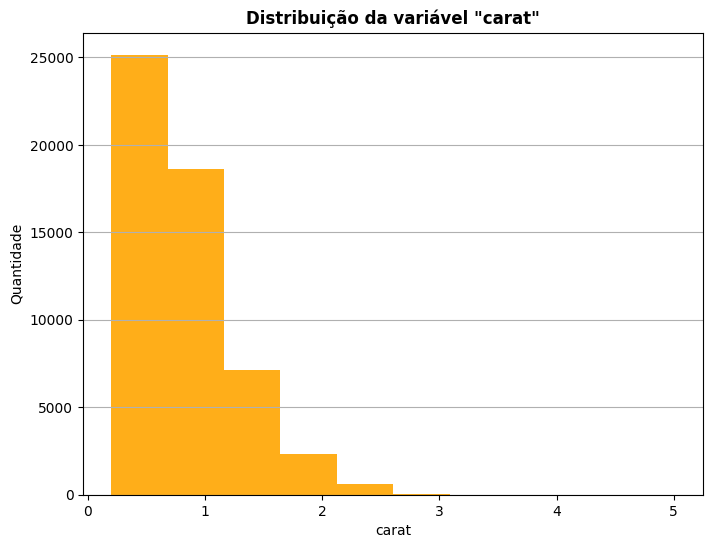

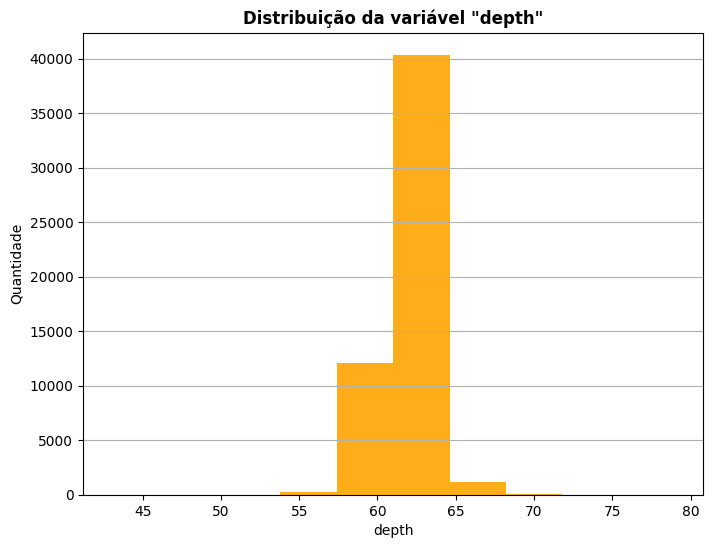

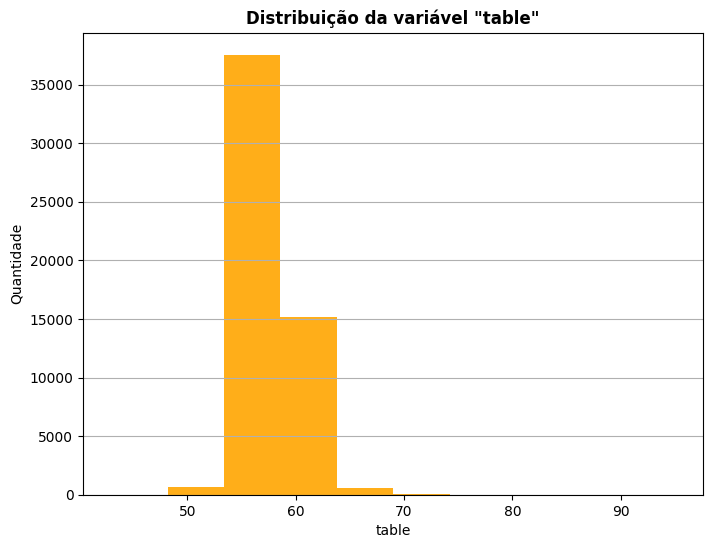

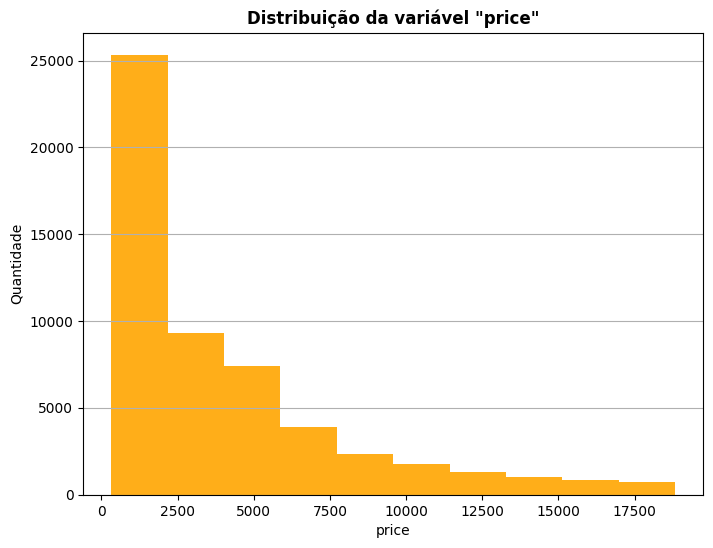

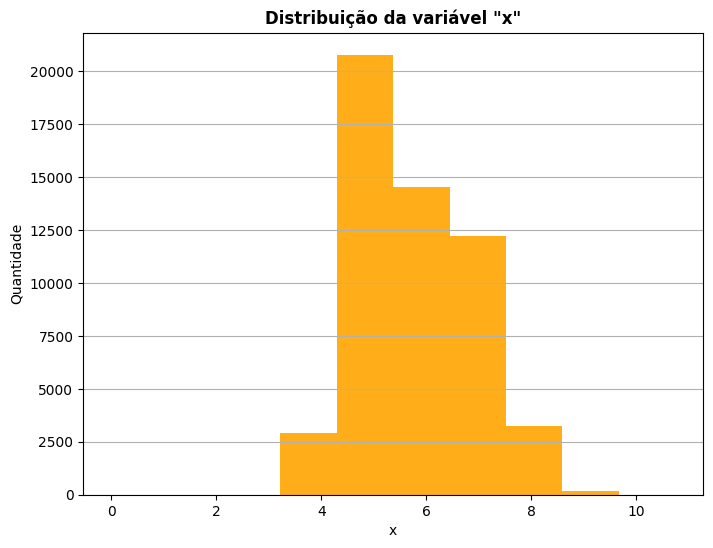

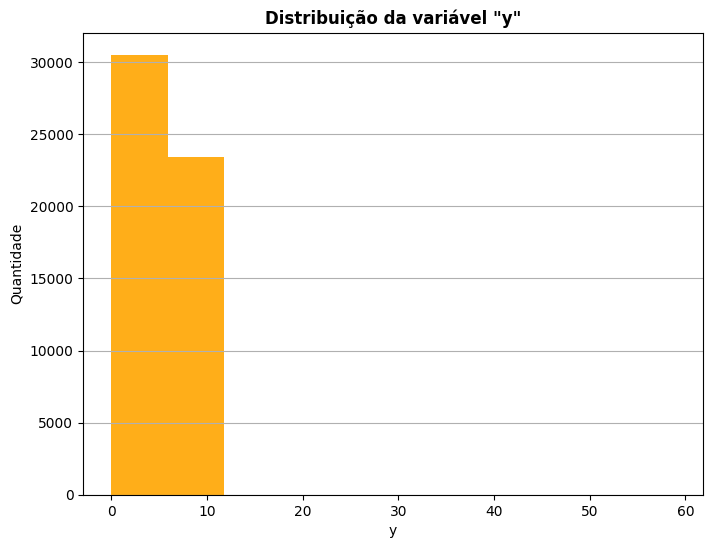

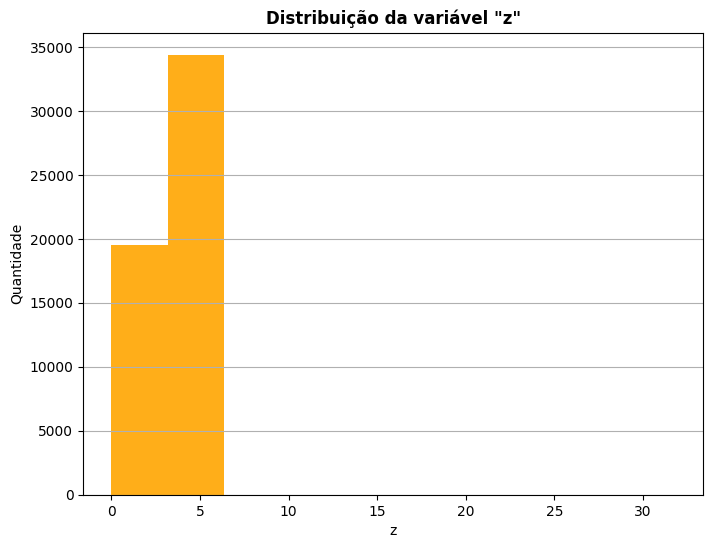

In [9]:
variaveis_quantitativas = dataset_dictionary[dataset_dictionary['tipo'] == 'quantitativa']['variavel']

for i, variavel in enumerate(variaveis_quantitativas):
    plt.figure(figsize=(8, 6))
    plt.hist(dataset[variavel], color='orange', alpha=0.9)
    plt.title(f'Distribuição da variável "{variavel}"', fontweight='bold')
    plt.xlabel(variavel)
    plt.ylabel('Quantidade')
    plt.grid(axis='y', linestyle='-')
    plt.show()

In [10]:
dataset['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

---
- A maioria dos diamantes tem o peso entre `0.2` e `0.5` gramas.
- A maioria dos diamantes tem profundidade entre `62%` e `65%`
- A maioria dos diamantes tem a face plana entre `50%` e `60%`
- Observando a tabela preço fica evidente que a maioria dos diamantes não tem o valor quotado entre `326 EUR` a `2500 EUR`
- Os graficos sugerem que as dimensões dos diamantes geralmente não são muito maiores  que `10mm` porem há algumas descrepancias como podemos observar em  `y` e `z` respectivamente largura média e profundidade média os valores de `58.9mm` e `31.9mm`
---

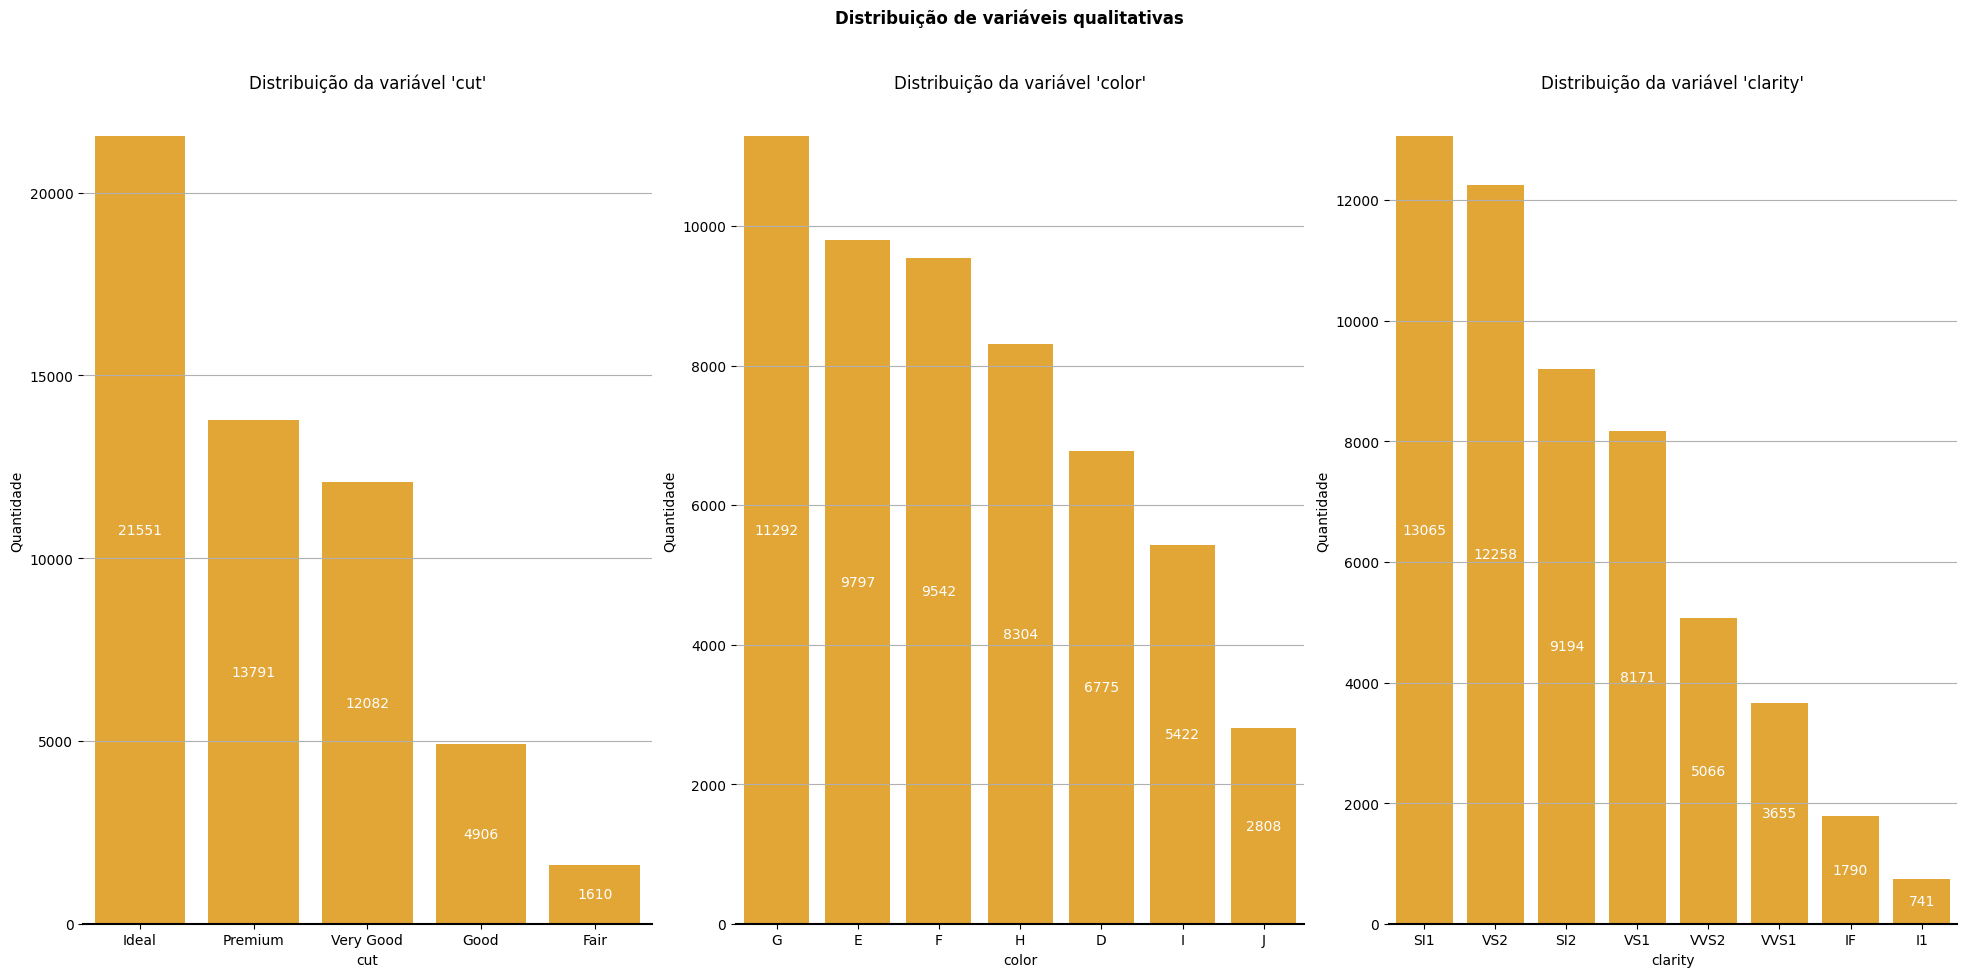

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
plt.subplots_adjust(wspace=-0.2)
plt.tight_layout(pad=3)

for i, variavel in enumerate(dataset_dictionary.query("tipo == 'qualitativa'").variavel.to_list()):
    order = dataset[variavel].value_counts().index
    ax = sns.countplot(
        data=dataset,
        x=variavel,
        ax=axes.flatten()[i],
        color='orange',
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="black", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')


plt.show()


---
- A maior parte dos diamantes apresentam a qualidade `Ideal`
- A grande maioria dos diamantes possuem a cor `G` (Near Colorless) que podem ser considerados de alta qualidade
- A maioria dos diamantes estão na classe `SI1` que é uma categoria buscada pelos compradores que buscam um bom valor com uma qualidade ok.
---

### Média dos preços em relação a qualidade dos cortes?


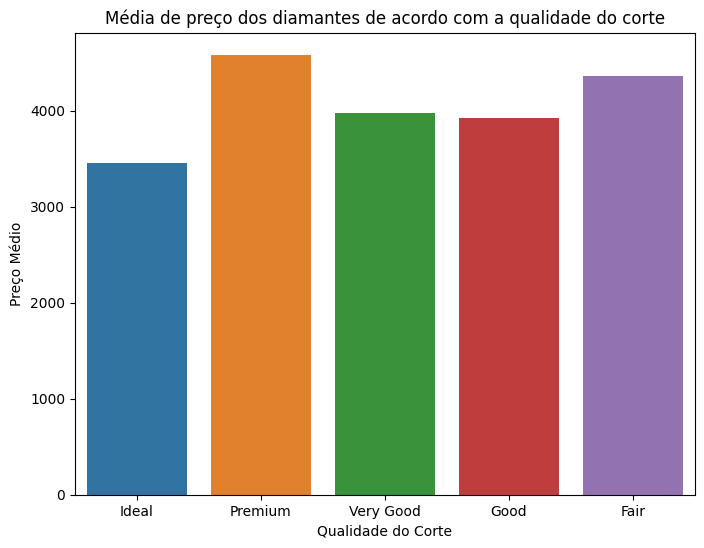

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset.groupby('cut').price.mean().index, y=dataset.groupby('cut').price.mean().values)
plt.title("Média de preço dos diamantes de acordo com a qualidade do corte")
plt.xlabel('Qualidade do Corte')
plt.ylabel('Preço Médio')
plt.show()

---
- Pode se observar que os cortes bom e muito bom não variam muito de preço além disso outros cortes com qualidade abaixo estão com um preço médio mais alto

---

### Qual é o impacto da cor e da clareza dos diamantes em seus preços? Existe uma tendência de que diamantes com cores mais claras ou maior clareza tenham preços mais altos?

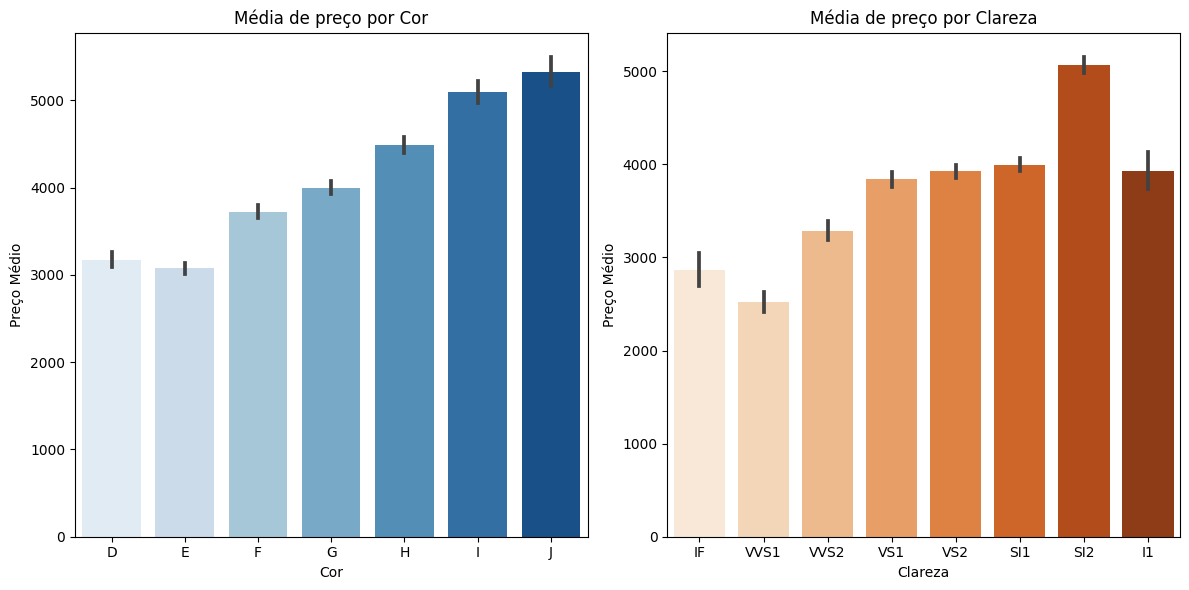

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='color', y='price', data=dataset, palette='Blues')

plt.title('Média de preço por Cor')
plt.xlabel('Cor')
plt.ylabel('Preço Médio')

plt.subplot(1, 2, 2)
sns.barplot(x='clarity', y='price', data=dataset, palette='Oranges')

plt.title('Média de preço por Clareza')
plt.xlabel('Clareza')
plt.ylabel('Preço Médio')

plt.tight_layout()
plt.show()


---
- Como a qualidade D é o melhor que se pode ter supostamente ela deveria ter a maior média de preços. 
- A clareza também demonstra mesmo comportamento diamantes mais claros deveriam ter um preço médio mais alto.
---

## 4. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

---
- Diamantes em sua maioria tem o preço entre `236` EUR e `2500` EUR
- Os diamantes mais procurados são os mais acessíveis em termo de preço podemos ver isso pelas suas caractecterísticas `cut` `color` e `clarity`
- Outros atributos influenciam no preço de um diamante como peso podemos ver isso ao analisar a tabela `Médias de preço por Cor` e `Média de preço por clareza` o que indica que tamanho `carat` seja um fator importante que influencia nisso.
---